In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machinelearninglab02/sample_submission (3).csv
/kaggle/input/machinelearninglab02/train (3).csv
/kaggle/input/machinelearninglab02/test (3).csv


# DataSet Loading and Decriptive Analaysis the Train and Test Data Set

In [2]:
df_train=pd.read_csv("/kaggle/input/machinelearninglab02/train (3).csv")
df_test=pd.read_csv("/kaggle/input/machinelearninglab02/test (3).csv")

Sorted the Column Name

In [3]:
df_train = df_train.reindex(sorted(df_train.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

In [4]:
df_train.describe()
#df_test.describe()

,album_component_count,album_name_length,artist_count,beat_frequency_0,beat_frequency_1,beat_frequency_2,duration_consistency,duration_ms_0,duration_ms_1,duration_ms_2,...,tempo_volatility,time_signature_0,time_signature_1,time_signature_2,tonal_mode_0,tonal_mode_1,tonal_mode_2,vocal_presence_0,vocal_presence_1,vocal_presence_2
count,57246.000000,52015.000000,58348.000000,51878.000000,61223.000000,59843.000000,5.853200e+04,6.032000e+04,5.250400e+04,6.048100e+04,...,51192.000000,59704.000000,59746.000000,58455.000000,61328.000000,57211.000000,59800.000000,61499.000000,60744.000000,59075.000000
mean,15.738549,18.225723,2.107030,119.133973,121.022910,120.716860,3.639169e+04,2.011315e+05,2.110477e+05,2.133022e+05,...,46.267820,3.874849,3.912915,3.901274,0.622375,0.632990,0.622625,0.132766,0.120560,0.121905
std,28.085831,14.404713,0.445663,32.067971,30.467061,30.937194,4.141806e+04,1.100738e+05,8.911099e+04,9.310889e+04,...,29.391937,0.564558,0.429358,0.465295,0.484797,0.481993,0.484734,0.154879,0.131923,0.134186
min,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,1.485000e+03,4.120000e+03,4.566000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,9.000000,2.000000,94.802250,96.138000,96.013000,1.426506e+04,1.482340e+05,1.682000e+05,1.682500e+05,...,21.844000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.039600,0.039800,0.039000
50%,13.000000,14.000000,2.000000,119.893000,120.012000,120.000000,2.571469e+04,1.959215e+05,2.029730e+05,2.061000e+05,...,43.376000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.061700,0.060900,0.060600
75%,16.000000,23.000000,2.000000,140.023000,141.401000,141.621000,4.662280e+04,2.402488e+05,2.413605e+05,2.441340e+05,...,67.233750,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.165000,0.152000,0.156000
max,1190.000000,199.000000,23.000000,235.998000,239.983000,246.322000,2.417273e+06,3.664274e+06,3.550973e+06,4.520334e+06,...,186.300000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.968000,0.968000,0.968000


In [5]:
df_test.describe()

,album_component_count,album_name_length,artist_count,beat_frequency_0,beat_frequency_1,beat_frequency_2,duration_consistency,duration_ms_0,duration_ms_1,duration_ms_2,...,tempo_volatility,time_signature_0,time_signature_1,time_signature_2,tonal_mode_0,tonal_mode_1,tonal_mode_2,vocal_presence_0,vocal_presence_1,vocal_presence_2
count,38196.000000,34818.000000,38809.000000,34617.000000,40795.000000,39849.000000,3.905200e+04,4.024400e+04,3.487000e+04,4.032900e+04,...,34258.000000,39831.000000,39823.000000,38995.000000,40906.000000,38041.000000,39967.000000,41009.000000,40530.000000,39382.000000
mean,15.606111,18.297145,2.106882,119.093564,121.188746,120.590522,3.674610e+04,2.015330e+05,2.127539e+05,2.130224e+05,...,46.599522,3.873641,3.908420,3.904372,0.621645,0.626745,0.623189,0.133665,0.120560,0.121287
std,26.117684,14.392102,0.426904,32.088262,30.748513,31.096090,5.293172e+04,1.214873e+05,1.166366e+05,9.822391e+04,...,29.581194,0.564785,0.440669,0.465687,0.484983,0.483675,0.484593,0.155918,0.131659,0.133021
min,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,2.391000e+03,4.120000e+03,4.285000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,9.000000,2.000000,94.646000,96.228500,95.757000,1.421229e+04,1.482500e+05,1.682965e+05,1.684660e+05,...,21.980000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.039500,0.039700,0.039000
50%,13.000000,14.000000,2.000000,119.659000,120.022000,119.985000,2.585386e+04,1.950930e+05,2.031730e+05,2.060760e+05,...,43.921000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.061600,0.061100,0.060500
75%,16.000000,23.000000,2.000000,140.037000,141.964500,141.095000,4.653934e+04,2.400000e+05,2.417662e+05,2.440000e+05,...,67.975000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.167000,0.153000,0.157000
max,1190.000000,238.000000,14.000000,239.713000,248.500000,220.251000,2.866482e+06,4.449616e+06,7.054236e+06,4.520334e+06,...,239.637000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.965000,0.971000,0.970000


In [6]:
print(df_train.isnull().sum())

album_component_count    4363
album_name_length        9594
artist_count             3261
beat_frequency_0         9731
beat_frequency_1          386
                         ... 
track_identifier         4436
vocal_presence_0          110
vocal_presence_1          865
vocal_presence_2         2534
weekday_of_release       5058
Length: 62, dtype: int64


In [7]:
print(df_test.isnull().sum())

album_component_count    2878
album_name_length        6256
artist_count             2265
beat_frequency_0         6457
beat_frequency_1          279
                         ... 
track_identifier         2951
vocal_presence_0           65
vocal_presence_1          544
vocal_presence_2         1692
weekday_of_release       3392
Length: 61, dtype: int64


In [8]:
print(df_train.columns)

Index(['album_component_count', 'album_name_length', 'artist_count',
       'beat_frequency_0', 'beat_frequency_1', 'beat_frequency_2',
       'composition_label_0', 'composition_label_1', 'composition_label_2',
       'creator_collective', 'duration_consistency', 'duration_ms_0',
       'duration_ms_1', 'duration_ms_2', 'emotional_charge_0',
       'emotional_charge_1', 'emotional_charge_2', 'emotional_resonance_0',
       'emotional_resonance_1', 'emotional_resonance_2', 'groove_efficiency_0',
       'groove_efficiency_1', 'groove_efficiency_2', 'harmonic_scale_0',
       'harmonic_scale_1', 'harmonic_scale_2', 'id', 'instrumental_density_0',
       'instrumental_density_1', 'instrumental_density_2', 'intensity_index_0',
       'intensity_index_1', 'intensity_index_2', 'key_variety', 'lunar_phase',
       'organic_immersion_0', 'organic_immersion_1', 'organic_immersion_2',
       'organic_texture_0', 'organic_texture_1', 'organic_texture_2',
       'performance_authenticity_0', 'perf

# Check Unique Values and Null Values in the train set and test set

In [9]:
Data_Frame=pd.DataFrame(index=df_train.columns.to_list())
Data_Frame['type']=df_train.dtypes
Data_Frame['Counts']=df_train.count()
Data_Frame['UniqueValues']=df_train.nunique()
Data_Frame['Null']=df_train.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame)


,type,Counts,UniqueValues,Null
album_component_count,float64,57246,164,4363
album_name_length,float64,52015,136,9594
artist_count,float64,58348,15,3261
beat_frequency_0,float64,51878,17047,9731
beat_frequency_1,float64,61223,18500,386
beat_frequency_2,float64,59843,18229,1766
composition_label_0,object,58660,21709,2949
composition_label_1,object,60149,22930,1460
composition_label_2,object,57146,22169,4463
creator_collective,object,52695,15139,8914


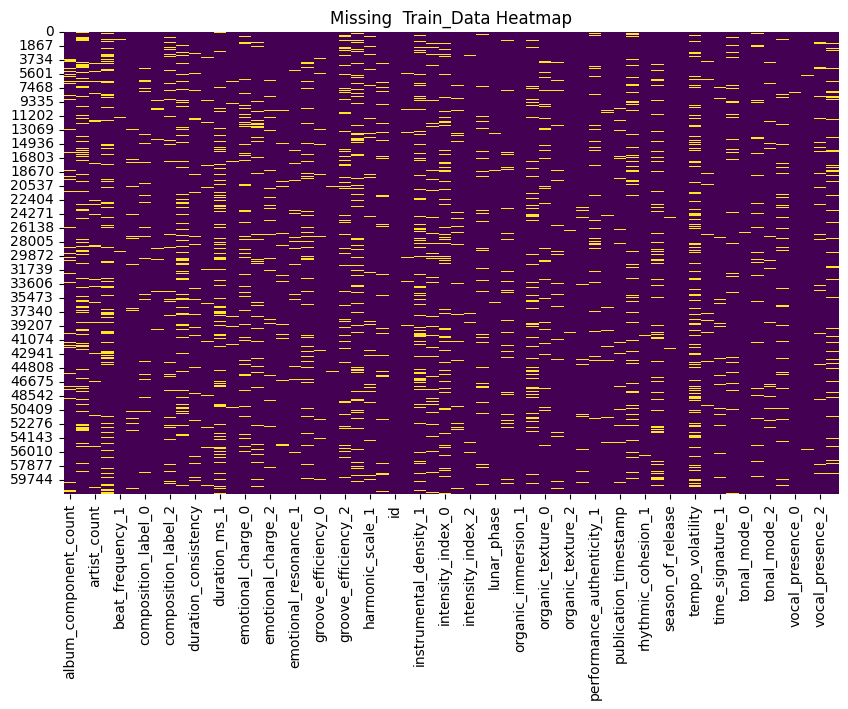

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cmap="viridis", cbar=False)
plt.title("Missing  Train_Data Heatmap")
plt.show()

In [11]:
with pd.option_context('display.max_rows', None):
    display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   album_component_count       57246 non-null  float64
 1   album_name_length           52015 non-null  float64
 2   artist_count                58348 non-null  float64
 3   beat_frequency_0            51878 non-null  float64
 4   beat_frequency_1            61223 non-null  float64
 5   beat_frequency_2            59843 non-null  float64
 6   composition_label_0         58660 non-null  object 
 7   composition_label_1         60149 non-null  object 
 8   composition_label_2         57146 non-null  object 
 9   creator_collective          52695 non-null  object 
 10  duration_consistency        58532 non-null  float64
 11  duration_ms_0               60320 non-null  float64
 12  duration_ms_1               52504 non-null  float64
 13  duration_ms_2               604

None

In [12]:
Data_Frame1=pd.DataFrame(index=df_test.columns.to_list())
Data_Frame1['type']=df_test.dtypes
Data_Frame1['Counts']=df_test.count()
Data_Frame1['UniqueValues']=df_test.nunique()
Data_Frame1['Null']=df_test.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame1)


,type,Counts,UniqueValues,Null
album_component_count,float64,38196,152,2878
album_name_length,float64,34818,131,6256
artist_count,float64,38809,12,2265
beat_frequency_0,float64,34617,13219,6457
beat_frequency_1,float64,40795,14358,279
beat_frequency_2,float64,39849,14112,1225
composition_label_0,object,39156,15986,1918
composition_label_1,object,40075,16824,999
composition_label_2,object,38192,16309,2882
creator_collective,object,35064,11311,6010


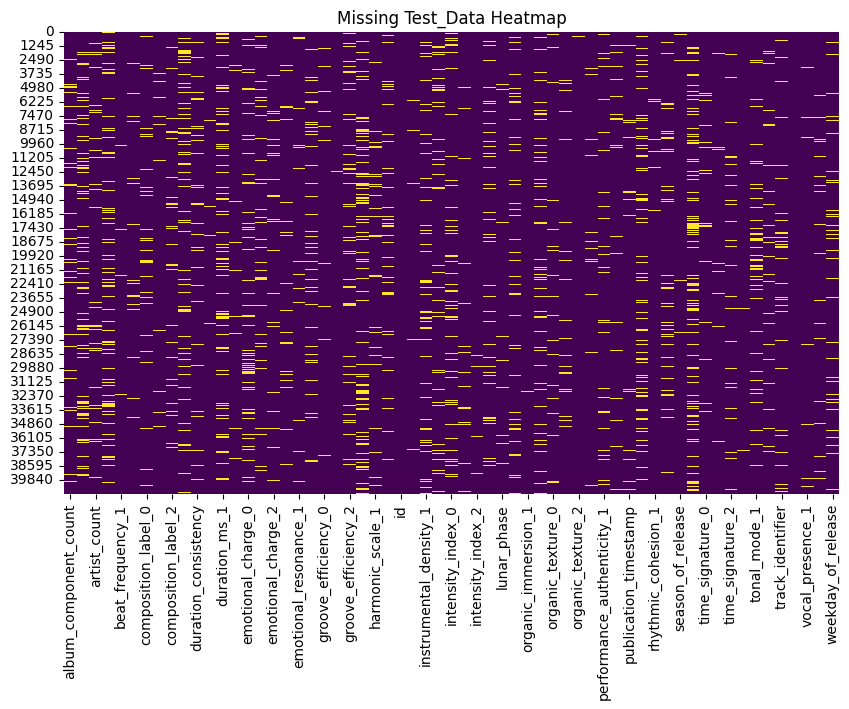

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_test.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Test_Data Heatmap")
plt.show()

In [14]:
with pd.option_context('display.max_rows', None):
    display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41074 entries, 0 to 41073
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   album_component_count       38196 non-null  float64
 1   album_name_length           34818 non-null  float64
 2   artist_count                38809 non-null  float64
 3   beat_frequency_0            34617 non-null  float64
 4   beat_frequency_1            40795 non-null  float64
 5   beat_frequency_2            39849 non-null  float64
 6   composition_label_0         39156 non-null  object 
 7   composition_label_1         40075 non-null  object 
 8   composition_label_2         38192 non-null  object 
 9   creator_collective          35064 non-null  object 
 10  duration_consistency        39052 non-null  float64
 11  duration_ms_0               40244 non-null  float64
 12  duration_ms_1               34870 non-null  float64
 13  duration_ms_2               403

None

# Data Preprocessing and Cleaning

Check Duplicate Rows 

In [15]:
df_train.duplicated().sum()
df_test.duplicated().sum()

0

In [16]:
df_train['is_train'] = 1
df_test['is_train'] = 0
test_ids = df_test['id']

Combined Train and Test Dataset for Preprocessing

In [17]:
combined_df = pd.concat([df_train, df_test], axis=0)

In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102683 entries, 0 to 41073
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   album_component_count       95442 non-null   float64
 1   album_name_length           86833 non-null   float64
 2   artist_count                97157 non-null   float64
 3   beat_frequency_0            86495 non-null   float64
 4   beat_frequency_1            102018 non-null  float64
 5   beat_frequency_2            99692 non-null   float64
 6   composition_label_0         97816 non-null   object 
 7   composition_label_1         100224 non-null  object 
 8   composition_label_2         95338 non-null   object 
 9   creator_collective          87759 non-null   object 
 10  duration_consistency        97584 non-null   float64
 11  duration_ms_0               100564 non-null  float64
 12  duration_ms_1               87374 non-null   float64
 13  duration_ms_2       

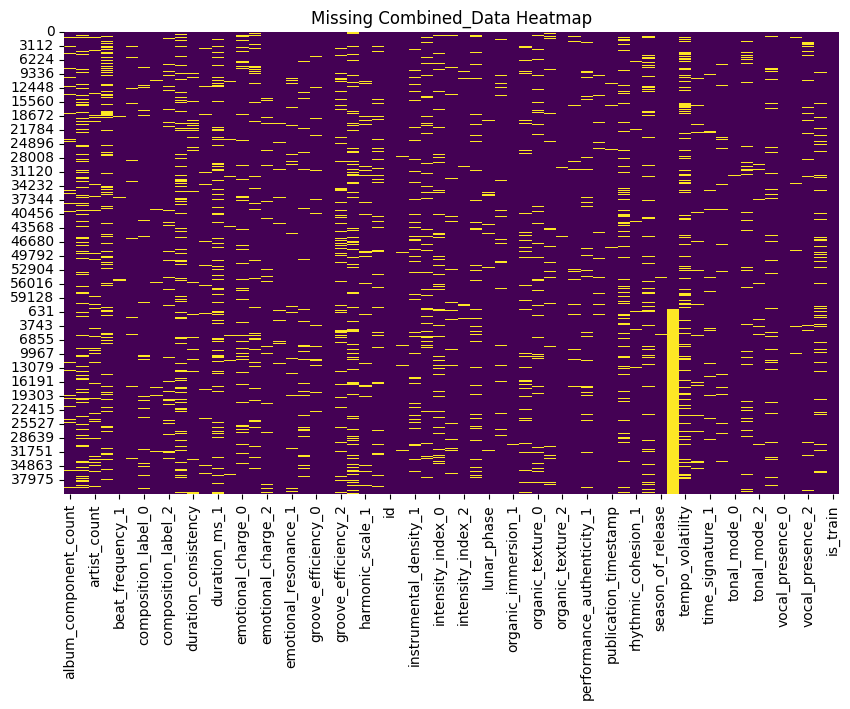

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Combined_Data Heatmap")
plt.show()

In [20]:
import pandas as pd
from datetime import datetime

# Keep original timestamp column
combined_df['original_publication_timestamp'] = combined_df['publication_timestamp']

# Convert to datetime
combined_df['publication_timestamp'] = pd.to_datetime(combined_df['publication_timestamp'], errors='coerce')

# Weekday mapping
weekday_name_map = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
}

# Create mask for valid timestamps
valid_timestamps_mask = combined_df['publication_timestamp'].notna()

# Add weekday column
combined_df.loc[valid_timestamps_mask, 'release_weekday'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.weekday
    .map(weekday_name_map)
)

# Season classification function
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:  # September, October, November
        return 'autumn'

# Add seasonal and temporal features
combined_df.loc[valid_timestamps_mask, 'release_season'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.month
    .apply(get_season)
)

combined_df.loc[valid_timestamps_mask, 'release_year'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.year
)

combined_df.loc[valid_timestamps_mask, 'release_month'] = (
    combined_df.loc[valid_timestamps_mask, 'publication_timestamp']
    .dt.month
)

In [21]:
mask = (combined_df['album_name_length'].isna()) & (combined_df['track_identifier'].notna())
combined_df.loc[mask, 'album_name_length'] = combined_df.loc[mask, 'track_identifier'].str.len()

# Verify the changes
print(f"Number of album_name_length values derived from track_identifier: {mask.sum()}")
print(f"Remaining missing album_name_length values: {combined_df['album_name_length'].isna().sum()}")

Number of album_name_length values derived from track_identifier: 14701
Remaining missing album_name_length values: 1149


<Figure size 1600x1200 with 0 Axes>

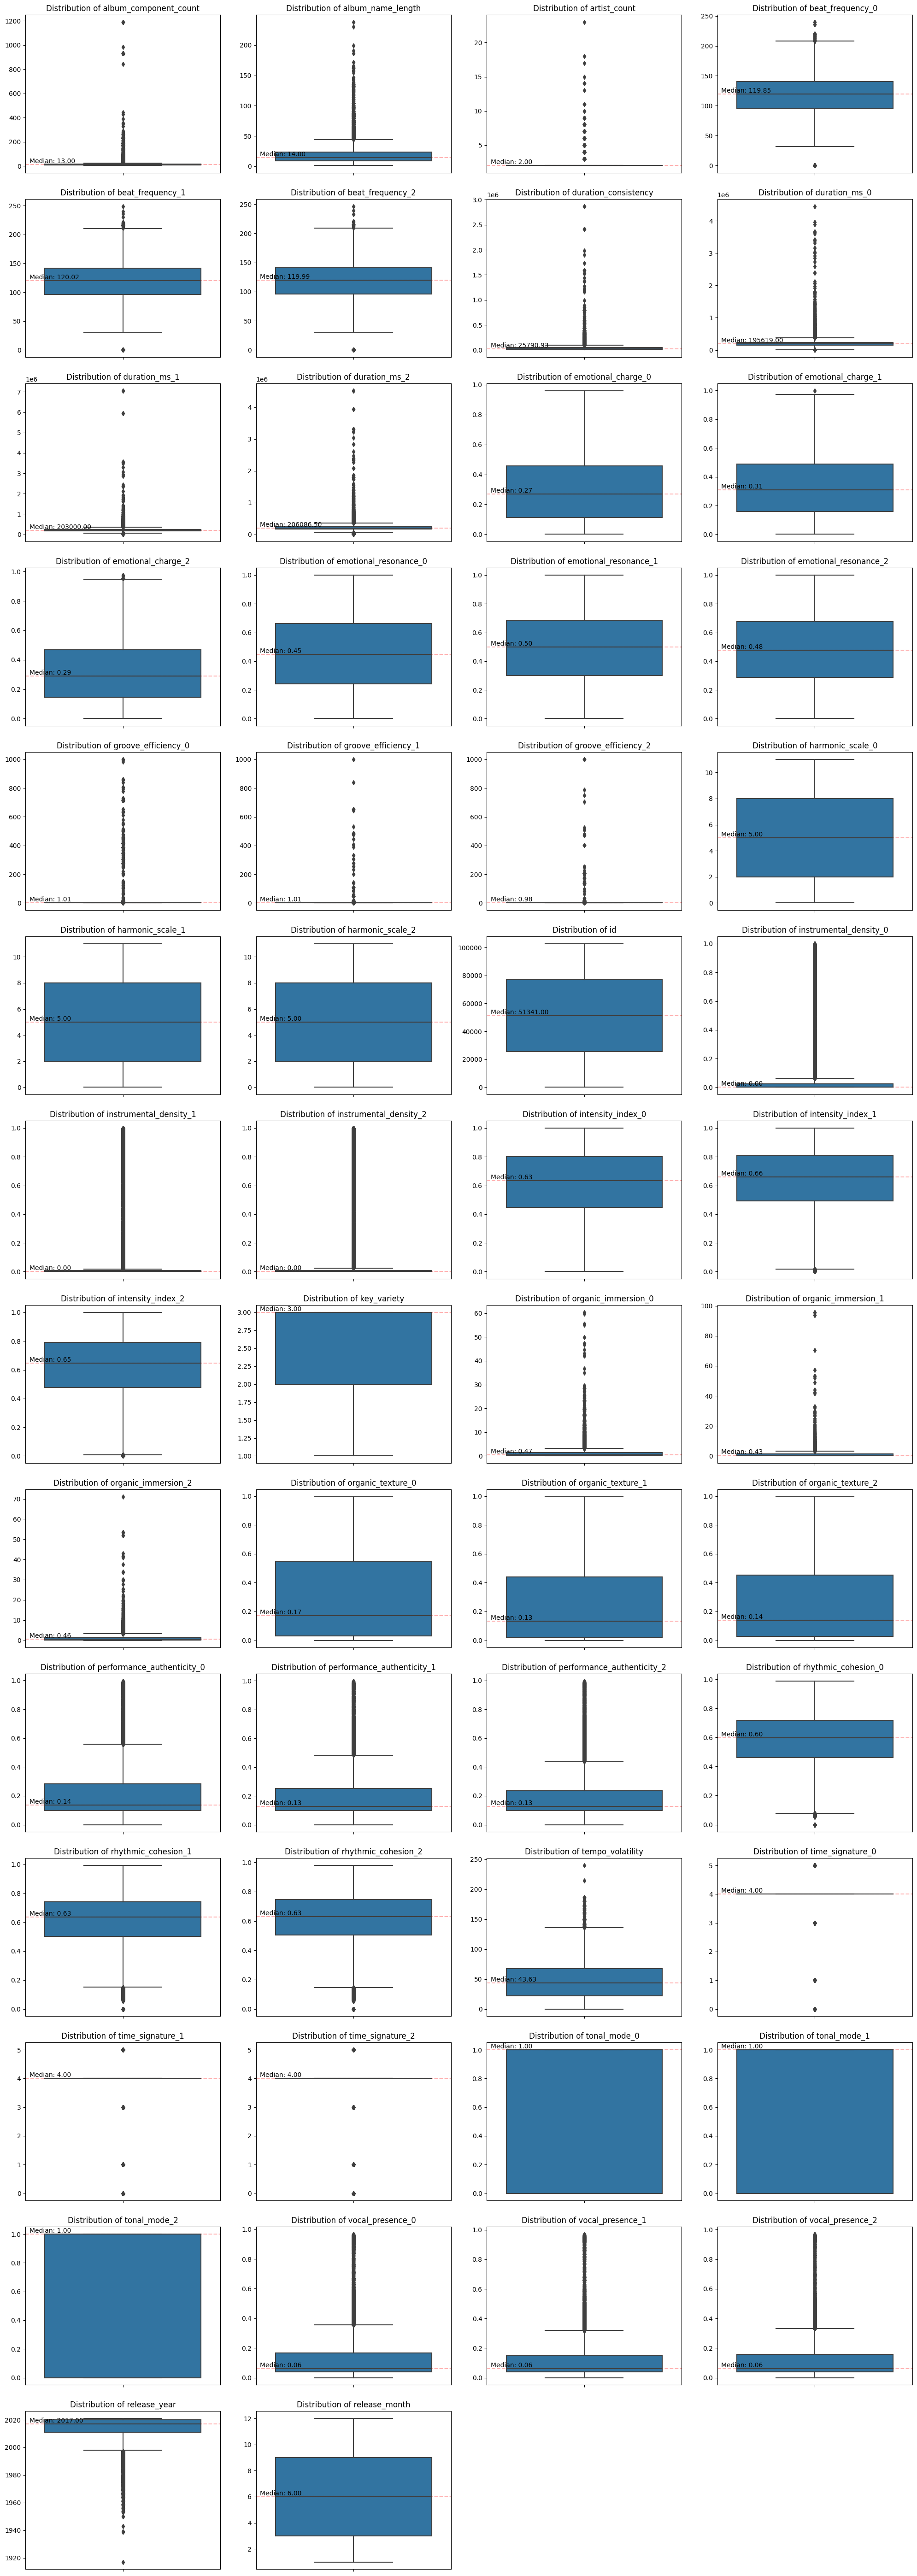

In [22]:
combined_df = combined_df.reset_index(drop=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(16, 12))

# Get all numerical columns
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove target and is_train from visualization if needed
if 'target' in numerical_cols:
    numerical_cols.remove('target')
if 'is_train' in numerical_cols:
    numerical_cols.remove('is_train')

# Plot boxplots in a grid
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4  # 4 plots per row, rounded up

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(y=combined_df[col], ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('')
        
        # Add median line for reference
        median = combined_df[col].median()
        axes[i].axhline(median, color='red', linestyle='--', alpha=0.3)
        axes[i].text(0.02, median, f'Median: {median:.2f}', 
                   horizontalalignment='left', 
                   verticalalignment='bottom',
                   transform=axes[i].get_yaxis_transform())

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102683 entries, 0 to 102682
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   album_component_count           95442 non-null   float64       
 1   album_name_length               101534 non-null  float64       
 2   artist_count                    97157 non-null   float64       
 3   beat_frequency_0                86495 non-null   float64       
 4   beat_frequency_1                102018 non-null  float64       
 5   beat_frequency_2                99692 non-null   float64       
 6   composition_label_0             97816 non-null   object        
 7   composition_label_1             100224 non-null  object        
 8   composition_label_2             95338 non-null   object        
 9   creator_collective              87759 non-null   object        
 10  duration_consistency            97584 non-null   float64

Drop Columns

In [24]:
combined_df=combined_df.drop(columns=[
    'composition_label_0',
    'composition_label_1',
    'composition_label_2',
    'original_publication_timestamp',
    'publication_timestamp',
    'track_identifier',
    'creator_collective'
])

In [25]:
# Replace NaN values with mode for categorical columns
replace_with_mode_cols = [
    'weekday_of_release', 
    'season_of_release', 
    'lunar_phase', 
    'artist_count',
    'instrumental_density_0',
    'instrumental_density_1',
    'instrumental_density_2',
    'key_variety',
    'time_signature_0',
    'time_signature_1',
    'time_signature_2',
    'tonal_mode_0',
    'tonal_mode_1',
    'tonal_mode_2',
    ]

for col in replace_with_mode_cols:
    mode_value = combined_df[col].mode()[0]
    combined_df.fillna({col: mode_value}, inplace=True)

In [26]:
# Group related features (e.g., beat_frequency_0, beat_frequency_1, beat_frequency_2)
feature_groups = {}
for col in combined_df.columns:
    # Extract base feature name (remove _0, _1, _2 suffix)
    if col[-2:] in ['_0', '_1', '_2']:
        base_name = col[:-2]
        if base_name not in feature_groups:
            feature_groups[base_name] = []
        feature_groups[base_name].append(col)

# Use related features for smarter imputation
for base_name, cols in feature_groups.items():
    # Skip if only one column in group
    if len(cols) <= 1:
        continue
        
    # For each column with nulls
    for col in cols:
        null_mask = combined_df[col].isnull()
        if null_mask.sum() > 0:
            # Try to use values from related columns (same feature, different track)
            related_values = combined_df.loc[null_mask, cols].mean(axis=1)
            
            # Create a mask for rows where both conditions are true
            valid_indices = null_mask.copy()
            valid_indices[null_mask] = related_values.notna().values
            
            # Update only where we have valid related values
            combined_df.loc[valid_indices, col] = related_values[related_values.notna()].values
            
            # For any remaining nulls, use median
            if combined_df[col].isnull().sum() > 0:
                combined_df.fillna({col: combined_df[col].median()}, inplace=True)

In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102683 entries, 0 to 102682
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   album_component_count       95442 non-null   float64
 1   album_name_length           101534 non-null  float64
 2   artist_count                102683 non-null  float64
 3   beat_frequency_0            102683 non-null  float64
 4   beat_frequency_1            102683 non-null  float64
 5   beat_frequency_2            102683 non-null  float64
 6   duration_consistency        97584 non-null   float64
 7   duration_ms_0               102683 non-null  float64
 8   duration_ms_1               102683 non-null  float64
 9   duration_ms_2               102683 non-null  float64
 10  emotional_charge_0          102683 non-null  float64
 11  emotional_charge_1          102683 non-null  float64
 12  emotional_charge_2          102683 non-null  float64
 13  emotional_reso

In [28]:
Data_Frame2=pd.DataFrame(index=combined_df.columns.to_list())
Data_Frame2['type']=combined_df.dtypes
Data_Frame2['Counts']=combined_df.count()
Data_Frame2['UniqueValues']=combined_df.nunique()
Data_Frame2['Null']=combined_df.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame2)

,type,Counts,UniqueValues,Null
album_component_count,float64,95442,189,7241
album_name_length,float64,101534,151,1149
artist_count,float64,102683,16,0
beat_frequency_0,float64,102683,31211,0
beat_frequency_1,float64,102683,25570,0
beat_frequency_2,float64,102683,26810,0
duration_consistency,float64,97584,34962,5099
duration_ms_0,float64,102683,29568,0
duration_ms_1,float64,102683,32348,0
duration_ms_2,float64,102683,28730,0


In [29]:
# Get remaining columns with null values
remaining_null_cols = combined_df.columns[combined_df.isnull().any()].tolist()
print(f"Columns with remaining nulls: {remaining_null_cols}")
print(f"Number of nulls in each: {combined_df[remaining_null_cols].isnull().sum()}")

# For numerical features, use median imputation
numerical_null_cols = combined_df[remaining_null_cols].select_dtypes(include=['float64', 'int64']).columns

# Handle numerical features with median
for col in numerical_null_cols:
    median_value = combined_df[col].median()
    combined_df.fillna({col:median_value}, inplace=True)
    print(f"Filled {col} nulls with median: {median_value:.3f}")

# Verify all nulls are handled
print(f"\nRemaining null values: {combined_df.isnull().sum().sum()}")

Columns with remaining nulls: ['album_component_count', 'album_name_length', 'duration_consistency', 'target', 'tempo_volatility', 'release_weekday', 'release_season', 'release_year', 'release_month']
Number of nulls in each: album_component_count     7241
album_name_length         1149
duration_consistency      5099
target                   41074
tempo_volatility         17233
release_weekday           2535
release_season            2535
release_year              2535
release_month             2535
dtype: int64
Filled album_component_count nulls with median: 13.000
Filled album_name_length nulls with median: 14.000
Filled duration_consistency nulls with median: 25790.935
Filled target nulls with median: 57.000
Filled tempo_volatility nulls with median: 43.629
Filled release_year nulls with median: 2017.000
Filled release_month nulls with median: 6.000

Remaining null values: 5070


In [30]:
Data_Frame2=pd.DataFrame(index=combined_df.columns.to_list())
Data_Frame2['type']=combined_df.dtypes
Data_Frame2['Counts']=combined_df.count()
Data_Frame2['UniqueValues']=combined_df.nunique()
Data_Frame2['Null']=combined_df.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame2)

,type,Counts,UniqueValues,Null
album_component_count,float64,102683,189,0
album_name_length,float64,102683,151,0
artist_count,float64,102683,16,0
beat_frequency_0,float64,102683,31211,0
beat_frequency_1,float64,102683,25570,0
beat_frequency_2,float64,102683,26810,0
duration_consistency,float64,102683,34963,0
duration_ms_0,float64,102683,29568,0
duration_ms_1,float64,102683,32348,0
duration_ms_2,float64,102683,28730,0


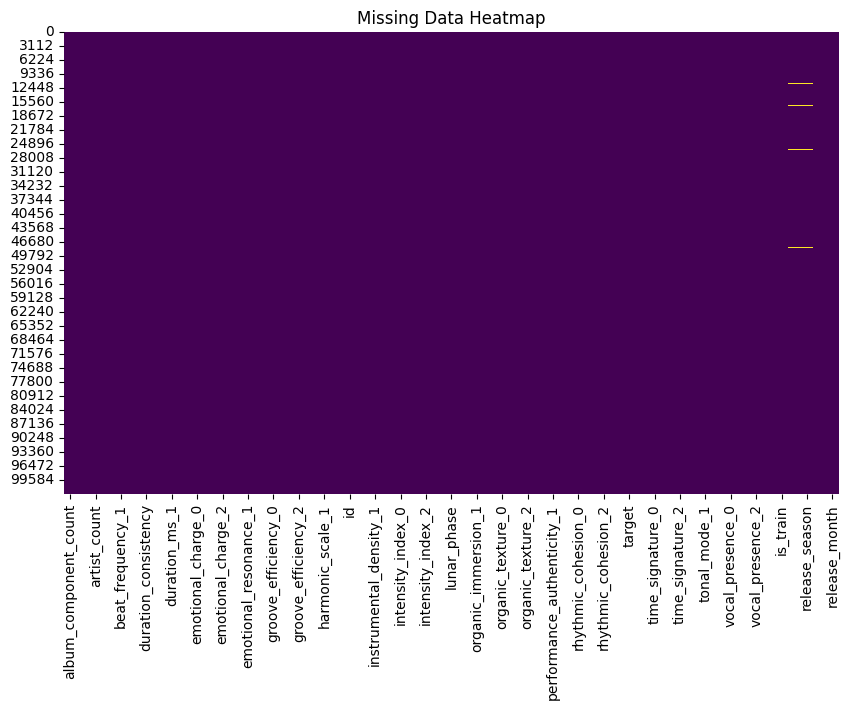

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [32]:
# For release_weekday (7 unique weekdays)
weekday_mode = combined_df['release_weekday'].mode()[0]  # Gets most frequent weekday
combined_df['release_weekday'] = combined_df['release_weekday'].fillna(weekday_mode)

# For release_season (4 unique seasons)
season_mode = combined_df['release_season'].mode()[0]  # Gets most frequent season
combined_df['release_season'] = combined_df['release_season'].fillna(season_mode)

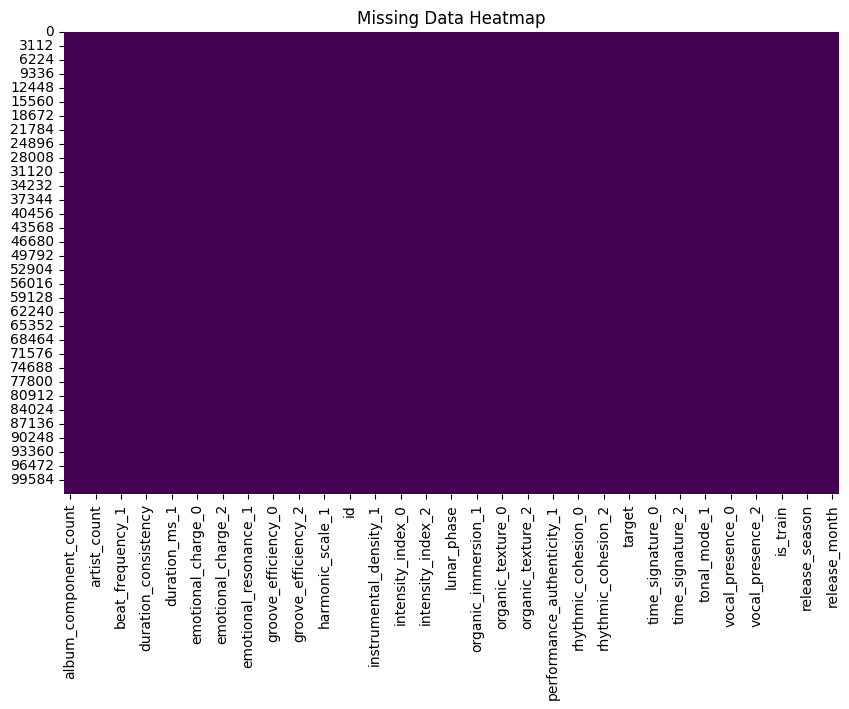

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [34]:
Data_Frame2=pd.DataFrame(index=combined_df.columns.to_list())
Data_Frame2['type']=combined_df.dtypes
Data_Frame2['Counts']=combined_df.count()
Data_Frame2['UniqueValues']=combined_df.nunique()
Data_Frame2['Null']=combined_df.isnull().sum()

with pd.option_context('display.max_rows', None):
    display(Data_Frame2)

,type,Counts,UniqueValues,Null
album_component_count,float64,102683,189,0
album_name_length,float64,102683,151,0
artist_count,float64,102683,16,0
beat_frequency_0,float64,102683,31211,0
beat_frequency_1,float64,102683,25570,0
beat_frequency_2,float64,102683,26810,0
duration_consistency,float64,102683,34963,0
duration_ms_0,float64,102683,29568,0
duration_ms_1,float64,102683,32348,0
duration_ms_2,float64,102683,28730,0


In [35]:
# Feature encoding for categorical variables
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 1. Option 1: One-hot encoding
# Create OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity

# Categorical columns to encode
cat_cols = ['lunar_phase', 'season_of_release', 'weekday_of_release']

# Apply one-hot encoding and convert to DataFrame
encoded_df = pd.DataFrame(
    one_hot.fit_transform(combined_df[cat_cols]),
    columns=one_hot.get_feature_names_out(cat_cols),
    index=combined_df.index
)

# Concatenate with original DataFrame (excluding the original categorical columns)
combined_df_encoded = pd.concat([combined_df.drop(columns=cat_cols), encoded_df], axis=1)

# Display the first few rows to verify encoding
print("One-hot encoded data shape:", combined_df_encoded.shape)
display(combined_df_encoded.head())

One-hot encoded data shape: (102683, 70)


,album_component_count,album_name_length,artist_count,beat_frequency_0,beat_frequency_1,beat_frequency_2,duration_consistency,duration_ms_0,duration_ms_1,duration_ms_2,...,lunar_phase_waxing,season_of_release_spring,season_of_release_summer,season_of_release_winter,weekday_of_release_Monday,weekday_of_release_Saturday,weekday_of_release_Sunday,weekday_of_release_Thursday,weekday_of_release_Tuesday,weekday_of_release_Wednesday
0,6.0,14.0,2.0,95.9920,80.018,162.045,15204.423983,154586.0,161853.0,189853.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,15.0,2.0,148.0760,147.966,125.964,45592.954911,46874.0,155619.0,123272.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,14.0,7.0,2.0,124.7380,142.980,134.403,38309.603777,264665.0,209378.0,302686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.0,5.0,2.0,115.4995,123.063,107.936,13345.980827,209208.0,219043.0,187126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,5.0,2.0,118.0060,132.722,0.000,110199.561452,215346.0,258893.0,6413.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
combined_df_encoded

,album_component_count,album_name_length,artist_count,beat_frequency_0,beat_frequency_1,beat_frequency_2,duration_consistency,duration_ms_0,duration_ms_1,duration_ms_2,...,lunar_phase_waxing,season_of_release_spring,season_of_release_summer,season_of_release_winter,weekday_of_release_Monday,weekday_of_release_Saturday,weekday_of_release_Sunday,weekday_of_release_Thursday,weekday_of_release_Tuesday,weekday_of_release_Wednesday
0,6.0,14.0,2.0,95.9920,80.018,162.045,15204.423983,154586.0,161853.0,189853.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,15.0,2.0,148.0760,147.966,125.964,45592.954911,46874.0,155619.0,123272.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,14.0,7.0,2.0,124.7380,142.980,134.403,38309.603777,264665.0,209378.0,302686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.0,5.0,2.0,115.4995,123.063,107.936,13345.980827,209208.0,219043.0,187126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,5.0,2.0,118.0060,132.722,0.000,110199.561452,215346.0,258893.0,6413.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102678,16.0,23.0,2.0,93.3110,110.001,126.088,21314.138067,239751.0,199849.0,190642.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102679,13.0,15.0,2.0,127.9870,135.984,95.023,45104.126562,304290.0,368006.0,257982.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
102680,17.0,18.0,2.0,73.1020,85.043,135.947,11752.372016,234146.0,236153.0,238160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102681,17.0,38.0,2.0,70.9100,79.227,84.148,85031.101302,59213.0,203346.0,261493.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
# Remove unwanted columns
combined_df_encoded = combined_df_encoded.drop(columns=['release_weekday', 'release_season'], errors='ignore')

In [38]:
# Split the combined dataset back into train and test
train_df_encoded = combined_df_encoded[combined_df_encoded['is_train'] == 1].copy()
test_df_encoded = combined_df_encoded[combined_df_encoded['is_train'] == 0].copy()

# Drop the is_train column from both datasets
train_df_encoded.drop('is_train', axis=1, inplace=True)
test_df_encoded.drop(['is_train', 'target'], axis=1, inplace=True)

# Reset indices for both datasets
train_df_encoded.reset_index(drop=True, inplace=True)
test_df_encoded.reset_index(drop=True, inplace=True)

# Verify the shapes
print(f"Original train shape: {df_train.shape}")
print(f"New train shape: {train_df_encoded.shape}")
print(f"Original test shape: {df_test.shape}")
print(f"New test shape: {test_df_encoded.shape}")


Original train shape: (61609, 63)
New train shape: (61609, 67)
Original test shape: (41074, 62)
New test shape: (41074, 66)


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


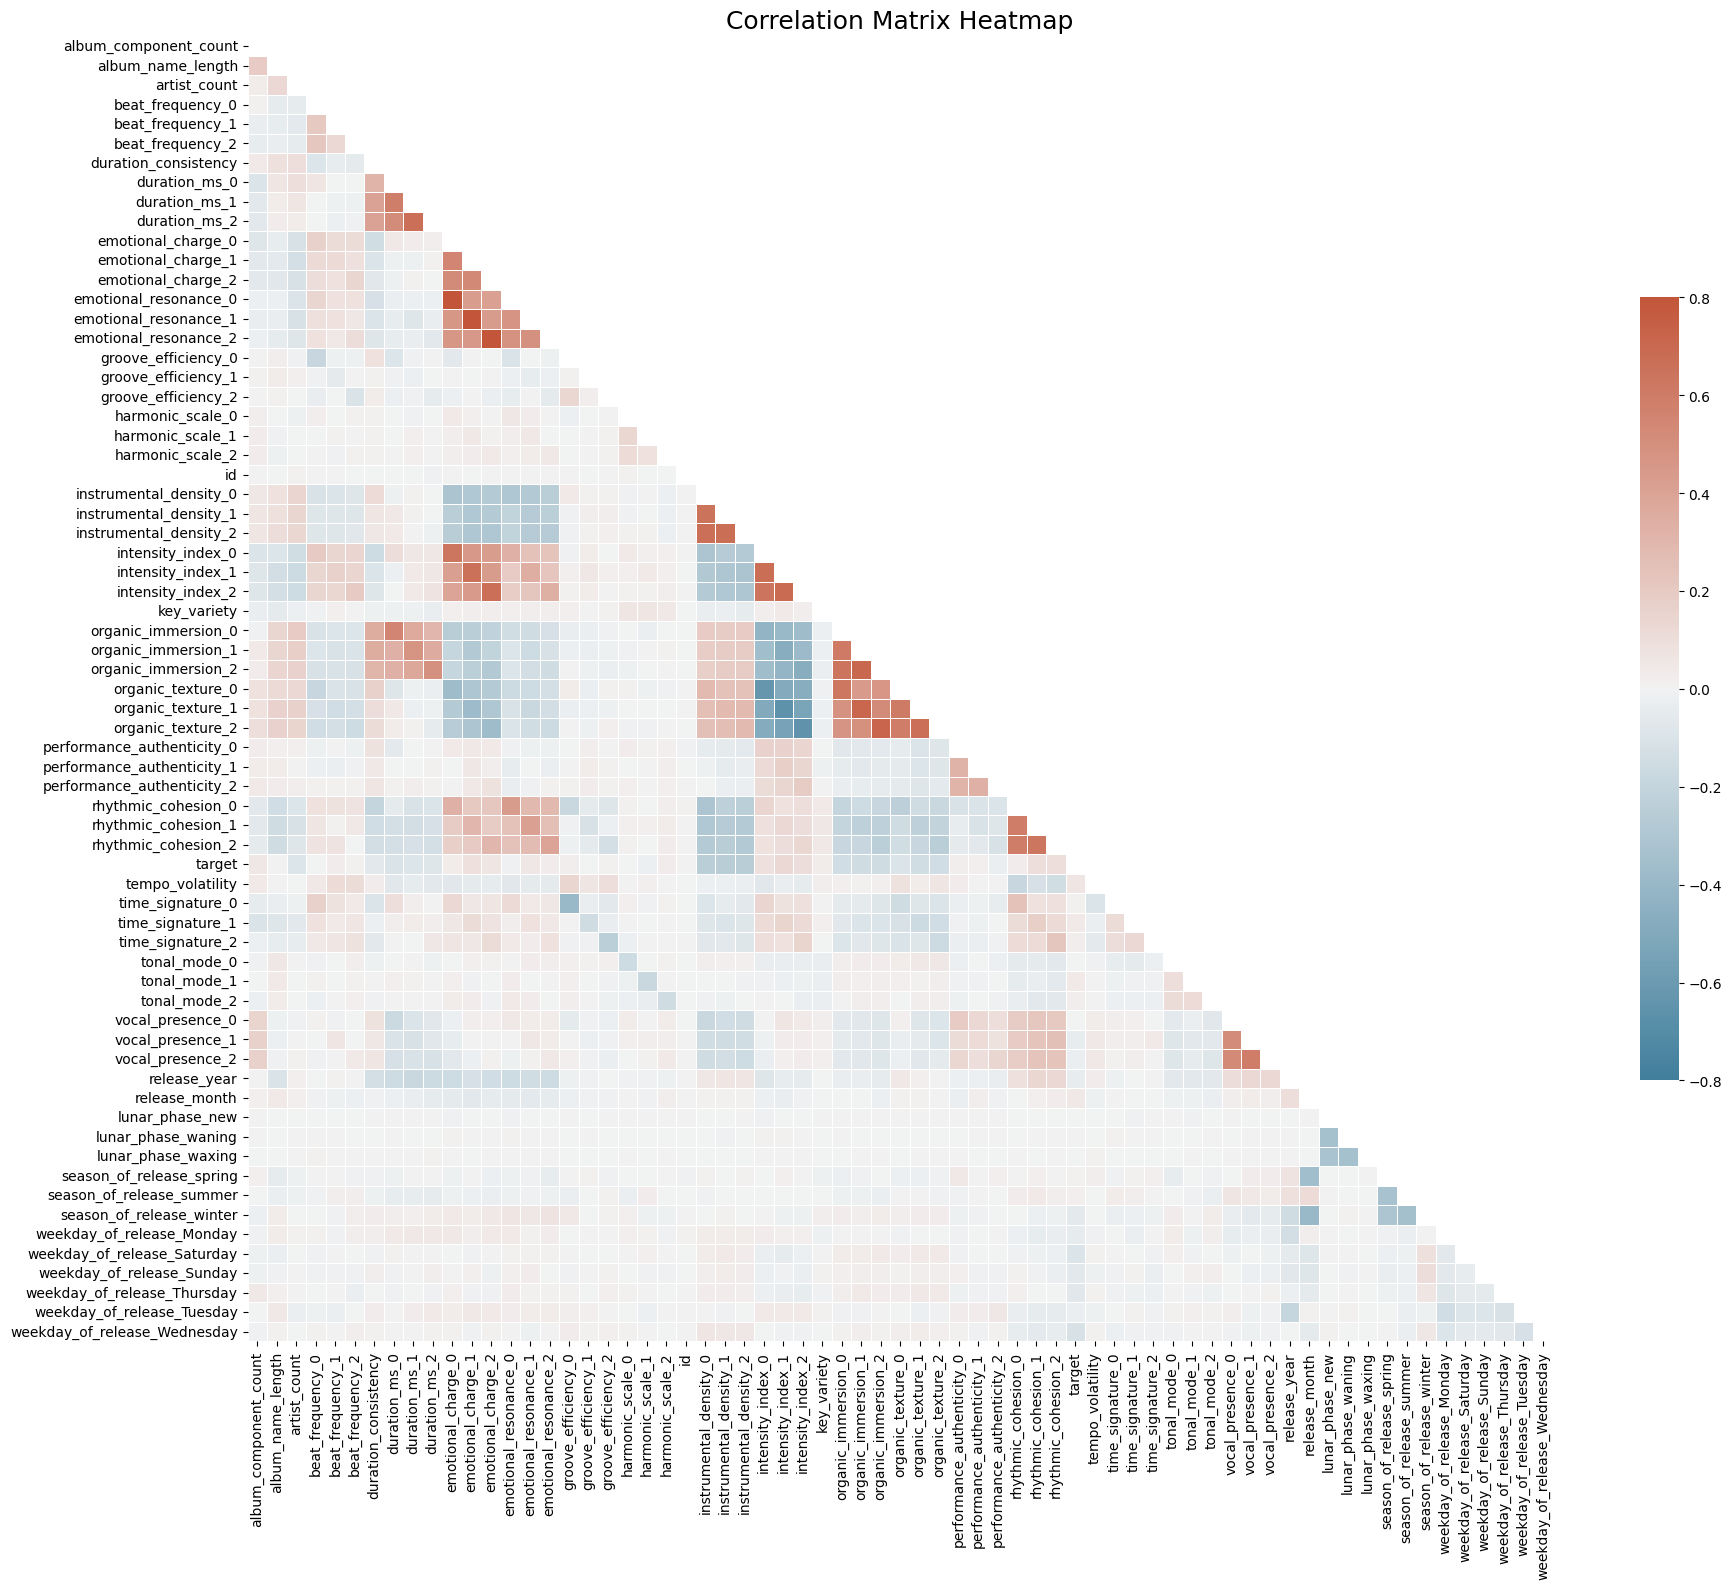

In [39]:
# Create correlation matrix and visualize as heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = train_df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=0.8, vmin=-0.8, center=0,
            square=True, linewidths=.5, annot=False, fmt='.2f', cbar_kws={"shrink": .6})

plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.tight_layout()
plt.show()



In [40]:
train_df_encoded

,album_component_count,album_name_length,artist_count,beat_frequency_0,beat_frequency_1,beat_frequency_2,duration_consistency,duration_ms_0,duration_ms_1,duration_ms_2,...,lunar_phase_waxing,season_of_release_spring,season_of_release_summer,season_of_release_winter,weekday_of_release_Monday,weekday_of_release_Saturday,weekday_of_release_Sunday,weekday_of_release_Thursday,weekday_of_release_Tuesday,weekday_of_release_Wednesday
0,6.0,14.0,2.0,95.9920,80.018,162.045,15204.423983,154586.0,161853.0,189853.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,15.0,2.0,148.0760,147.966,125.964,45592.954911,46874.0,155619.0,123272.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,14.0,7.0,2.0,124.7380,142.980,134.403,38309.603777,264665.0,209378.0,302686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.0,5.0,2.0,115.4995,123.063,107.936,13345.980827,209208.0,219043.0,187126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,5.0,2.0,118.0060,132.722,0.000,110199.561452,215346.0,258893.0,6413.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61604,10.0,43.0,2.0,91.0155,90.017,92.014,23496.831574,218490.0,183381.0,240432.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
61605,12.0,6.0,2.0,165.1920,122.973,124.932,48023.116399,259746.0,204533.0,142186.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61606,28.0,66.0,2.0,121.0620,121.045,150.260,52381.481480,79093.0,157426.0,30253.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61607,12.0,9.0,2.0,139.8630,95.390,99.048,16053.272612,208906.0,174000.0,207133.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   album_component_count         61609 non-null  float64
 1   album_name_length             61609 non-null  float64
 2   artist_count                  61609 non-null  float64
 3   beat_frequency_0              61609 non-null  float64
 4   beat_frequency_1              61609 non-null  float64
 5   beat_frequency_2              61609 non-null  float64
 6   duration_consistency          61609 non-null  float64
 7   duration_ms_0                 61609 non-null  float64
 8   duration_ms_1                 61609 non-null  float64
 9   duration_ms_2                 61609 non-null  float64
 10  emotional_charge_0            61609 non-null  float64
 11  emotional_charge_1            61609 non-null  float64
 12  emotional_charge_2            61609 non-null  float64
 13  e

In [42]:
import re

def combine_feature_groups(df):
    # Find all columns ending with _0, _1, _2
    pattern = re.compile(r'(.+)_([0-2])$')
    groups = {}
    for col in df.columns:
        m = pattern.match(col)
        if m:
            base = m.group(1)
            groups.setdefault(base, []).append(col)
    # For each group, create the average column and drop originals
    for base, cols in groups.items():
        if len(cols) > 1:
            df[base] = df[cols].mean(axis=1)
            df.drop(columns=cols, inplace=True)
    return df

# Apply to both train and test encoded DataFrames
train_df_encoded = combine_feature_groups(train_df_encoded)
test_df_encoded = combine_feature_groups(test_df_encoded)

In [43]:
def combine_feature_groups(df):
    """
    Combines related features into new averaged features and drops the original columns.
    Args:
        df (pd.DataFrame): Input DataFrame with original features.
    Returns:
        pd.DataFrame: DataFrame with new combined features added and original columns dropped.
    """
    # Combine organic-related features and drop originals
    if 'organic_immersion' in df.columns and 'organic_texture' in df.columns:
        df['organic_combined'] = df[['organic_immersion', 'organic_texture']].mean(axis=1)
        df = df.drop(columns=['organic_immersion', 'organic_texture'])  # Drop original columns
    
   
    
    return df

# Apply to both datasets
train_df_encoded = combine_feature_groups(train_df_encoded)
test_df_encoded = combine_feature_groups(test_df_encoded)

# Verify columns were dropped
print("Train columns after drop:", train_df_encoded.columns.tolist())
print("Test columns after drop:", test_df_encoded.columns.tolist())

Train columns after drop: ['album_component_count', 'album_name_length', 'artist_count', 'duration_consistency', 'id', 'key_variety', 'target', 'tempo_volatility', 'release_year', 'release_month', 'lunar_phase_new', 'lunar_phase_waning', 'lunar_phase_waxing', 'season_of_release_spring', 'season_of_release_summer', 'season_of_release_winter', 'weekday_of_release_Monday', 'weekday_of_release_Saturday', 'weekday_of_release_Sunday', 'weekday_of_release_Thursday', 'weekday_of_release_Tuesday', 'weekday_of_release_Wednesday', 'beat_frequency', 'duration_ms', 'emotional_charge', 'emotional_resonance', 'groove_efficiency', 'harmonic_scale', 'instrumental_density', 'intensity_index', 'performance_authenticity', 'rhythmic_cohesion', 'time_signature', 'tonal_mode', 'vocal_presence', 'organic_combined']
Test columns after drop: ['album_component_count', 'album_name_length', 'artist_count', 'duration_consistency', 'id', 'key_variety', 'tempo_volatility', 'release_year', 'release_month', 'lunar_phas

In [44]:
train_df_encoded

,album_component_count,album_name_length,artist_count,duration_consistency,id,key_variety,target,tempo_volatility,release_year,release_month,...,groove_efficiency,harmonic_scale,instrumental_density,intensity_index,performance_authenticity,rhythmic_cohesion,time_signature,tonal_mode,vocal_presence,organic_combined
0,6.0,14.0,2.0,15204.423983,76339,2.0,74.0,82.027,2021.0,6.0,...,1.159688,5.000000,0.000000,0.757000,0.255000,0.667000,4.000000,1.000000,0.077200,0.143215
1,3.0,15.0,2.0,45592.954911,80006,3.0,2.0,22.112,2019.0,7.0,...,1.100234,3.666667,0.014428,0.797500,0.335500,0.677000,4.000000,0.333333,0.598500,0.335259
2,14.0,7.0,2.0,38309.603777,83501,3.0,35.0,18.242,2014.0,11.0,...,1.156066,6.666667,0.000000,0.765000,0.222933,0.721000,4.000000,0.000000,0.340000,0.526544
3,15.0,5.0,2.0,13345.980827,81530,3.0,70.0,43.629,2015.0,9.0,...,1.197116,8.000000,0.000112,0.773333,0.167000,0.645000,4.000000,0.333333,0.052600,0.167207
4,17.0,5.0,2.0,110199.561452,60534,2.0,78.0,132.722,2006.0,1.0,...,1.049871,2.666667,0.000119,0.551700,0.272667,0.518667,2.666667,0.666667,0.027567,0.124509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61604,10.0,43.0,2.0,23496.831574,75677,3.0,16.0,43.629,2020.0,2.0,...,0.707403,5.000000,0.000005,0.499333,0.188267,0.705000,4.000000,0.333333,0.037933,0.919479
61605,12.0,6.0,2.0,48023.116399,29591,3.0,69.0,42.219,2019.0,8.0,...,0.977798,6.500000,0.000057,0.619333,0.127833,0.661000,4.000000,1.000000,0.095233,0.914477
61606,28.0,66.0,2.0,52381.481480,62355,2.0,55.0,43.629,2021.0,7.0,...,0.896378,10.000000,0.423333,0.585333,0.107600,0.740000,4.000000,0.333333,0.090200,1.004192
61607,12.0,9.0,2.0,16053.272612,88778,3.0,88.0,44.473,2019.0,12.0,...,1.497185,6.000000,0.000046,0.808333,0.189333,0.557333,4.000000,0.666667,0.050167,0.253748


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


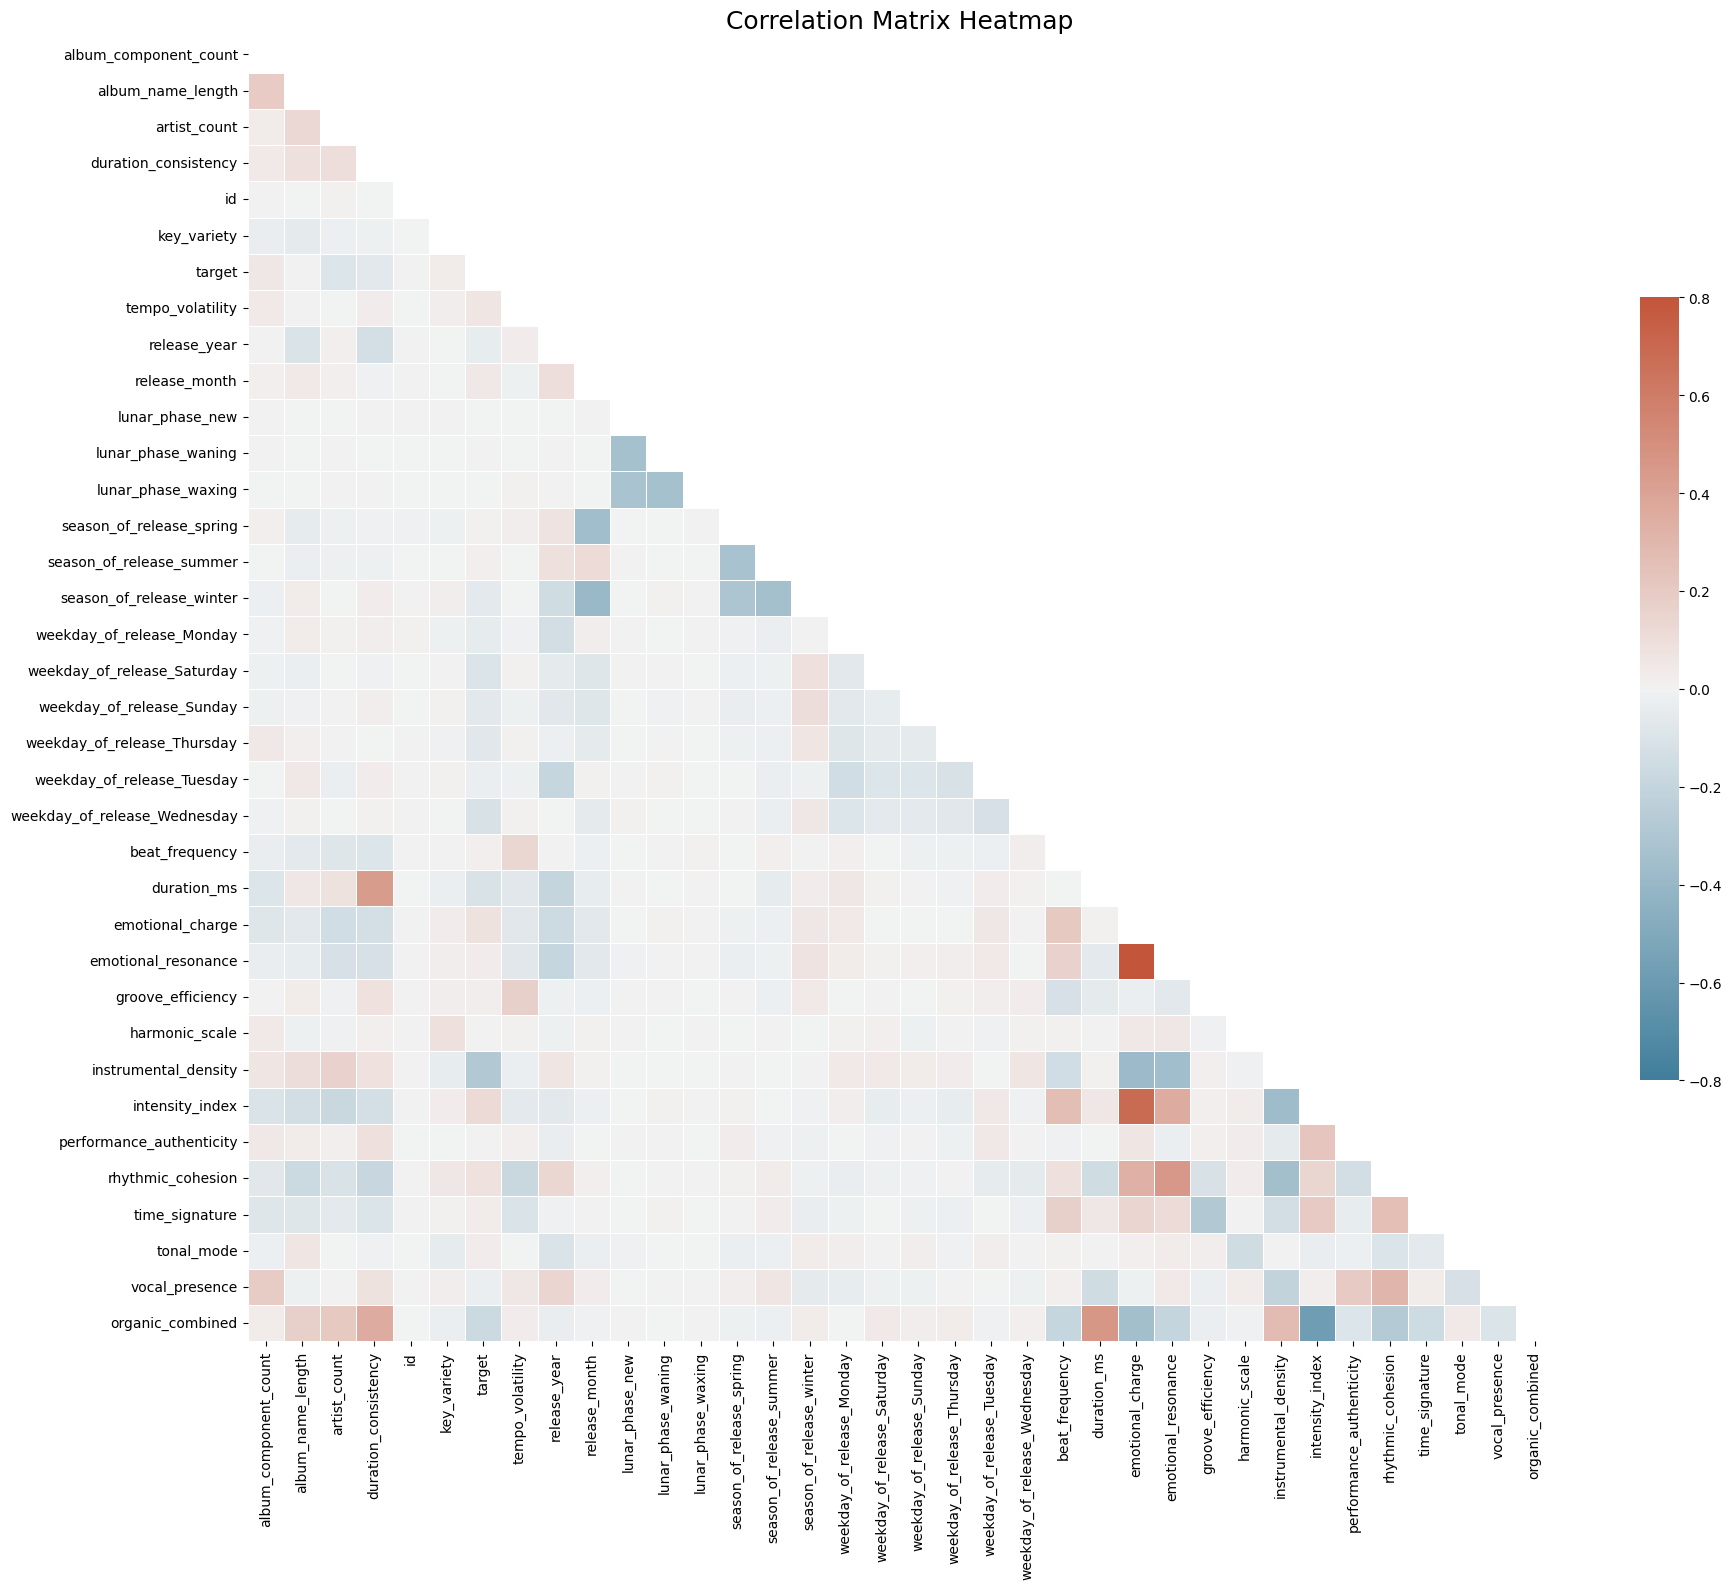

In [45]:
# Create correlation matrix and visualize as heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = train_df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=0.8, vmin=-0.8, center=0,
            square=True, linewidths=.5, annot=False, fmt='.2f', cbar_kws={"shrink": .6})

plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.tight_layout()
plt.show()



# Train the Data Set

In [46]:
from sklearn.model_selection import train_test_split
X = train_df_encoded.drop(columns=["target", "id"])
y = train_df_encoded["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 19.54212878626316


In [48]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(),
#     "Lasso Regression": Lasso(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(),
#     "Gradient Boosting": GradientBoostingRegressor(),
#     "Support Vector Regressor": SVR(),
#     "XGBoost Regressor": XGBRegressor(objective='reg:squarederror'),
#     "LightGBM": LGBMRegressor()
  
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#     print(f"{name}: RMSE = {rmse:.4f}")


In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror'),
    "LightGBM": LGBMRegressor()
}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    # Print results
    print(f"{name}:")
    print(f"  MSE = {mse:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R² = {r2:.4f}")
    print("-" * 40)

Linear Regression:
  MSE = 381.8948
  RMSE = 19.5421
  R² = 0.1800
----------------------------------------
Ridge Regression:
  MSE = 381.8965
  RMSE = 19.5422
  R² = 0.1800
----------------------------------------
Lasso Regression:
  MSE = 430.6382
  RMSE = 20.7518
  R² = 0.0754
----------------------------------------
Decision Tree:
  MSE = 284.9873
  RMSE = 16.8816
  R² = 0.3881
----------------------------------------
Random Forest:
  MSE = 132.9699
  RMSE = 11.5313
  R² = 0.7145
----------------------------------------
Gradient Boosting:
  MSE = 298.3630
  RMSE = 17.2732
  R² = 0.3594
----------------------------------------
Support Vector Regressor:
  MSE = 459.7847
  RMSE = 21.4426
  R² = 0.0128
----------------------------------------
XGBoost Regressor:
  MSE = 176.9138
  RMSE = 13.3009
  R² = 0.6201
----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007450 seconds.
You can set `force_row_wise=true` t

# **Using Cross Validation**

In [50]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Update models to include preprocessing pipelines
models = {
    
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Ridge Regression": make_pipeline(StandardScaler(), Ridge()),
    "Lasso Regression": make_pipeline(StandardScaler(), Lasso()),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": make_pipeline(StandardScaler(), SVR()),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror'),
    "LightGBM": LGBMRegressor()
}

# Set up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = 'neg_root_mean_squared_error'  # Negative RMSE (higher is better)

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, 
                               cv=kfold, scoring=scoring, n_jobs=-1)
    mean_rmse = -cv_scores.mean()
    std_rmse = cv_scores.std()
    print(f"{name}:")
    print(f"  Mean CV RMSE = {mean_rmse:.4f} (±{std_rmse:.4f})")
    print(f"  Individual folds: {-cv_scores.round(4)}")
    
    # Optional: Refit on full training data and evaluate on holdout set
    model.fit(X_train, y_train)
    val_rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
    print(f"  Holdout RMSE = {val_rmse:.4f}\n")


Linear Regression:
  Mean CV RMSE = 19.6107 (±0.1074)
  Individual folds: [19.4107 19.646  19.6811 19.5988 19.717 ]
  Holdout RMSE = 19.5421

Ridge Regression:
  Mean CV RMSE = 19.6107 (±0.1074)
  Individual folds: [19.4107 19.646  19.6811 19.5988 19.717 ]
  Holdout RMSE = 19.5421

Lasso Regression:
  Mean CV RMSE = 20.2236 (±0.1341)
  Individual folds: [20.0014 20.3675 20.2577 20.1515 20.3399]
  Holdout RMSE = 20.1772

Decision Tree:
  Mean CV RMSE = 17.1809 (±0.2127)
  Individual folds: [17.5307 16.8857 17.0886 17.1381 17.2613]
  Holdout RMSE = 16.7348

Random Forest:
  Mean CV RMSE = 11.8318 (±0.1210)
  Individual folds: [11.6651 11.7581 11.7967 11.9501 11.989 ]
  Holdout RMSE = 11.5286

Gradient Boosting:
  Mean CV RMSE = 17.3671 (±0.1486)
  Individual folds: [17.1724 17.2946 17.3257 17.4266 17.6162]
  Holdout RMSE = 17.2732

Support Vector Regressor:
  Mean CV RMSE = 18.2131 (±0.1001)
  Individual folds: [18.0305 18.3329 18.2259 18.2156 18.2607]
  Holdout RMSE = 18.1040

XGBoost R

# Choose Random Forest to train 

In [51]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 11.519041093614575


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define model
model = RandomForestRegressor()

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the search
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Best RMSE:", rmse)
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3726
[LightGBM] [Info] Number of data points in the train set: 39430, number of used features: 34
[LightGBM] [Info] Start training from score 52.027264
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3732
[LightGBM] [Info] Number of data points in the train set: 39430, number of used features: 34
[LightGBM] [Info] Start training from score 52.056201


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3731
[LightGBM] [Info] Number of data points in the train set: 39429, number of used features: 34
[LightGBM] [Info] Start training from score 52.019250


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best RMSE: 11.291631712831638
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Prepare your training data (assuming train_df_encoded exists)
X_train = train_df_encoded.drop(columns=["target", "id"])
y_train = train_df_encoded["target"]

# 2. Train the model with your best parameters
best_params = {
    'n_estimators': 500,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': None
}

model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)  # THIS IS THE CRUCIAL STEP YOU WERE MISSING

# 3. Prepare test data (must have same features as training)
X_test = test_df_encoded.drop(columns=['id'])

# Verify features match
assert set(X_train.columns) == set(X_test.columns), "Feature mismatch between train and test"

# 4. Generate predictions
test_predictions = model.predict(X_test)

# 5. Create submission DataFrame
submission = pd.DataFrame({
    'id': test_df_encoded['id'],
    'target': test_predictions
})

# 6. Save to CSV
submission.to_csv('/kaggle/working/submission.csv', index=False)
print("Submission file created successfully!")
print(f"Predictions range from {test_predictions.min():.2f} to {test_predictions.max():.2f}")

Submission file created successfully!
Predictions range from 9.00 to 100.00


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import time

# Define base models with reduced estimators for faster training
base_models = [
    ('Random Forest', RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)),
    ('XGBoost', XGBRegressor(objective='reg:squarederror', n_estimators=10, random_state=42)),
    ('CatBoost', CatBoostRegressor(iterations=10, silent=True, random_state=42)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=10, random_state=42, n_jobs=-1))
]

print("Creating Stacking Regressor...")
start_time = time.time()

# Create optimized stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    cv=5,
    n_jobs=-1  # Parallelize the stacking process
)

print(f"Stacking setup completed in {time.time() - start_time:.2f} seconds")

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 
    'r2': make_scorer(r2_score)
}

print("\nStarting 5-fold cross-validation...")
cv_start = time.time()

# Evaluate using 5-fold cross-validation
results = cross_validate(
    stacking_regressor,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print(f"Cross-validation completed in {time.time() - cv_start:.2f} seconds")

# Calculate mean metrics
metrics = {
    'train_mse': -np.mean(results['train_mse']),
    'train_rmse': np.mean(results['train_rmse']),
    'train_r2': np.mean(results['train_r2']),
    'test_mse': -np.mean(results['test_mse']),
    'test_rmse': np.mean(results['test_rmse']),
    'test_r2': np.mean(results['test_r2'])
}

# Print results
print("\nStacking Regressor Performance (5-fold CV):")
print(f"Training MSE: {metrics['train_mse']:.4f}")
print(f"Training RMSE: {metrics['train_rmse']:.4f}")
print(f"Training R²: {metrics['train_r2']:.4f}")
print("-" * 40)
print(f"Validation MSE: {metrics['test_mse']:.4f}")
print(f"Validation RMSE: {metrics['test_rmse']:.4f}")
print(f"Validation R²: {metrics['test_r2']:.4f}")

# Final training and validation
print("\nTraining final model on full training set...")
fit_start = time.time()
stacking_regressor.fit(X_train, y_train)
print(f"Final training completed in {time.time() - fit_start:.2f} seconds")

print("\nEvaluating on validation set...")
y_pred = stacking_regressor.predict(X_val)

final_metrics = {
    'mse': mean_squared_error(y_val, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_val, y_pred)),
    'r2': r2_score(y_val, y_pred)
}

print("\nFinal Evaluation on Validation Set:")
print(f"MSE: {final_metrics['mse']:.4f}")
print(f"RMSE: {final_metrics['rmse']:.4f}")
print(f"R²: {final_metrics['r2']:.4f}")

# Prepare test predictions (if test data is available)
try:
    X_test = test_df_encoded.drop(columns=['id'])
    X_test = X_test[X_train.columns]  # Ensure same feature order
    test_predictions = stacking_regressor.predict(X_test)
    
    submission = pd.DataFrame({
        'id': test_df_encoded['id'],
        'target': test_predictions
    })
    
    submission.to_csv('stacking_submission.csv', index=False)
    print("\nSubmission file created: stacking_submission.csv")
    print(f"Test predictions range: {test_predictions.min():.2f} to {test_predictions.max():.2f}")
except NameError:
    print("\nNo test data found - skipping submission file creation")

Creating Stacking Regressor...
Stacking setup completed in 0.00 seconds

Starting 5-fold cross-validation...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3727
[LightGBM] [Info] Number of data points in the train set: 39429, number of used features: 34
[LightGBM] [Info] Start training from score 52.117198
Cross-validation completed in 179.40 seconds

Stacking Regressor Performance (5-fold CV):
Training MSE: 6.9692
Training RMSE: 2.6398
Training R²: 0.9850
----------------------------------------
Validation MSE: 122.9711
Validation RMSE: 11.0890
Validation R²: 0.7356

Training final model on full training set...
Final training completed in 45.48 seconds

Evaluating on validation set...

Final Evaluation on Validation Set:
MSE: 6.9847
RMSE: 2.6429
R²: 0.9850

Submission file created: stacking_submission.csv
Test predictions range: -1.96 to 105.2

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import time

# Define base models with reduced estimators for faster training
base_models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)),
    ('XGBoost', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)),
    ('CatBoost', CatBoostRegressor(iterations=100, silent=True, random_state=42)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1))
]

print("Creating Stacking Regressor...")
start_time = time.time()

# Create optimized stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    cv=5,
    n_jobs=-1  # Parallelize the stacking process
)

print(f"Stacking setup completed in {time.time() - start_time:.2f} seconds")

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 
    'r2': make_scorer(r2_score)
}

print("\nStarting 5-fold cross-validation...")
cv_start = time.time()

# Evaluate using 5-fold cross-validation
results = cross_validate(
    stacking_regressor,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print(f"Cross-validation completed in {time.time() - cv_start:.2f} seconds")

# Calculate mean metrics
metrics = {
    'train_mse': -np.mean(results['train_mse']),
    'train_rmse': np.mean(results['train_rmse']),
    'train_r2': np.mean(results['train_r2']),
    'test_mse': -np.mean(results['test_mse']),
    'test_rmse': np.mean(results['test_rmse']),
    'test_r2': np.mean(results['test_r2'])
}

# Print results
print("\nStacking Regressor Performance (5-fold CV):")
print(f"Training MSE: {metrics['train_mse']:.4f}")
print(f"Training RMSE: {metrics['train_rmse']:.4f}")
print(f"Training R²: {metrics['train_r2']:.4f}")
print("-" * 40)
print(f"Validation MSE: {metrics['test_mse']:.4f}")
print(f"Validation RMSE: {metrics['test_rmse']:.4f}")
print(f"Validation R²: {metrics['test_r2']:.4f}")

# Final training and validation
print("\nTraining final model on full training set...")
fit_start = time.time()
stacking_regressor.fit(X_train, y_train)
print(f"Final training completed in {time.time() - fit_start:.2f} seconds")

print("\nEvaluating on validation set...")
y_pred = stacking_regressor.predict(X_val)

final_metrics = {
    'mse': mean_squared_error(y_val, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_val, y_pred)),
    'r2': r2_score(y_val, y_pred)
}

print("\nFinal Evaluation on Validation Set:")
print(f"MSE: {final_metrics['mse']:.4f}")
print(f"RMSE: {final_metrics['rmse']:.4f}")
print(f"R²: {final_metrics['r2']:.4f}")

# Prepare test predictions (if test data is available)
try:
    X_test = test_df_encoded.drop(columns=['id'])
    X_test = X_test[X_train.columns]  # Ensure same feature order
    test_predictions = stacking_regressor.predict(X_test)
    
    submission = pd.DataFrame({
        'id': test_df_encoded['id'],
        'target': test_predictions
    })
    
    submission.to_csv('stacking_submissionwith_100.csv', index=False)
    print("\nSubmission file created: stacking_submission.csv")
    print(f"Test predictions range: {test_predictions.min():.2f} to {test_predictions.max():.2f}")
except NameError:
    print("\nNo test data found - skipping submission file creation")

Creating Stacking Regressor...
Stacking setup completed in 0.01 seconds

Starting 5-fold cross-validation...
Cross-validation completed in 1703.50 seconds

Stacking Regressor Performance (5-fold CV):
Training MSE: 8.4721
Training RMSE: 2.9104
Training R²: 0.9818
----------------------------------------
Validation MSE: 112.4244
Validation RMSE: 10.6029
Validation R²: 0.7583

Training final model on full training set...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)


Final training completed in 444.47 seconds

Evaluating on validation set...

Final Evaluation on Validation Set:
MSE: 7.9609
RMSE: 2.8215
R²: 0.9829

Submission file created: stacking_submission.csv
Test predictions range: -3.51 to 105.79
